In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("new_results.csv")

In [40]:
results.head()

,Unnamed: 0,Unnamed: 0.1,index,coef,std err,t,P>|t|,[0.025,0.975],r^2,...,hispanic_combined_solar,asian_combined_solar,black_maj_solar,asian_maj_solar,hispanic_maj_solar,final_race_Asian,final_race_Black or African American,final_race_Hispanic or Latino,at_least_one,MSA
0,0,0,final_race_Asian,-3.1445,1.5219999999999998,-2.066,0.039,-6.127999999999999,-0.161,0.3945122469257465,...,NaN,NaN,0.121338,NaN,NaN,0,1,1,1,26420.0
1,1,1,final_race_Black or African American,16.5705,2.173,7.626,0.0,12.311,20.83,0.3945122469257465,...,NaN,NaN,0.121338,NaN,NaN,0,1,1,1,26420.0
2,2,2,final_race_Hispanic or Latino,9.5671,1.301,7.355,0.0,7.017,12.117,0.3945122469257465,...,NaN,NaN,0.121338,NaN,NaN,0,1,1,1,26420.0
3,3,3,final_race_Race Not Available,1.8592,2.039,0.912,0.36200000000000004,-2.1390000000000002,5.857,0.3945122469257465,...,NaN,NaN,0.121338,NaN,NaN,0,1,1,1,26420.0
4,4,4,derived_sex_Female,1.1286,1.216,0.9279999999999999,0.353,-1.255,3.513,0.3945122469257465,...,NaN,NaN,0.121338,NaN,NaN,0,1,1,1,26420.0


In [41]:
results.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'coef', 'std err', 't', 'P>|t|',
       '[0.025', '0.975]', 'r^2', 'p', 'black_combined_solar',
       'hispanic_combined_solar', 'asian_combined_solar', 'black_maj_solar',
       'asian_maj_solar', 'hispanic_maj_solar', 'final_race_Asian',
       'final_race_Black or African American', 'final_race_Hispanic or Latino',
       'at_least_one', 'MSA'],
      dtype='object')

In [3]:
# all MSAs in the results
all_msas = pd.unique(results['MSA'])

In [4]:
# table that maps each MSAs to their indicators of whether they have racial disparities or not


# below are indicators of racial disparities for all the msas
black = [list(results[results['MSA'] == msa]['final_race_Black or African American'])[0] for msa in all_msas]
asian = [list(results[results['MSA'] == msa]['final_race_Asian'])[0] for msa in all_msas]
hispanic = [list(results[results['MSA'] == msa]['final_race_Hispanic or Latino'])[0] for msa in all_msas]


temp = pd.DataFrame({'MSA': all_msas, 
                    'asian': asian,
                    'hispanic': hispanic, 
                    'black': black,
                    'asian_shuffled': np.random.permutation(asian), 
                    'hispanic_shuffled': np.random.permutation(hispanic),
                    'black_shuffled': np.random.permutation(black)})


In [5]:
temp.head()

,MSA,asian,hispanic,black,asian_shuffled,hispanic_shuffled,black_shuffled
0,26420.0,0,1,1,0,1,0
1,32820.0,0,0,0,0,1,0
2,16860.0,0,0,0,0,0,0
3,34980.0,0,0,1,0,0,0
4,33340.0,0,0,0,0,0,0


In [6]:
def calc_statistic(race, have_disparity, combined):
    '''Calculate the average of MSAs (with or without) race disparity. 
    Input _race_ can take values: final_race_Black or African American, 
    final_race_Hispanic or Latino, final_race_Asian.
    Input _disparity_ can take values: 1 and 0.
    Input _combined_ can take values: 1 and 0.'''
    
    # determine which race to calculate the statistic on 
    if race == "final_race_Hispanic or Latino":
            stat_col = 'hispanic_combined_solar' if combined else 'hispanic_maj_solar'
        
    elif race == 'final_race_Asian':
            stat_col = 'asian_combined_solar' if combined else 'asian_maj_solar'
            
    else:
            stat_col = 'black_combined_solar' if combined else 'black_maj_solar'
    
    # rows representing MSAs with (or without) race disparities
    disparity = results[results[race] == have_disparity]

    # MSAs with (or without) race disparities 
    msas = pd.unique([msa for msa in disparity['MSA']])
    
    # list of statistic
    stat_temp = [list(disparity[disparity['MSA'] == msa][stat_col])[0] for msa in msas]
    
    # take out NaN values
    no_nan = [val for val in stat_temp if pd.notnull(val)]
    
    # average of statistic 
    return np.mean(no_nan)
    

In [7]:
def calc_statistic_shuffled(race, have_disparity, combined):
    '''Calculate the average of MSAs (with or without) race disparity after shuffled. 
    Input _race_ can take values: black_shuffled, hispanic_shuffled,
    and asian_shuffled.

    Input _disparity_ can take values: 1 and 0.
    Input _combined_ can take values: 1 and 0.'''
    
    # shuffle column
    temp[race] = np.random.permutation(temp[race[:-9]].values)
    
    # determine which race to calculate the statistic on 
    if race == 'hispanic_shuffled':
            stat_col = 'hispanic_combined_solar' if combined else 'hispanic_maj_solar'
        
    elif race == 'asian_shuffled':
            stat_col = 'asian_combined_solar' if combined else 'asian_maj_solar'
            
    else:
            stat_col = 'black_combined_solar' if combined else 'black_maj_solar'
    
    # MSAs with (or without) race disparities 
    msas = pd.unique([msa for msa in temp[temp[race] == have_disparity]['MSA']])
    
    # list of statistic
    stat_temp = [list(results[results['MSA'] == msa][stat_col])[0] for msa in msas]
    
    # take out NaN values
    no_nan = [val for val in stat_temp if pd.notnull(val)]
    
    # average of statistic 
    return np.mean(no_nan)
    

In [8]:
def original_stat():
    '''Calculate the original statistic'''
    
    # !order of this list matters
    races = ['final_race_Asian', 'final_race_Hispanic or Latino', 
             'final_race_Black or African American',  
             ]
    # !order of this list matters 
    combined = [1, 0]
    original_stats = []
    
    for r in races:
        for c in combined:
            # with disparity 
            with_disp = calc_statistic(*[r, 1, c])
            # without disparity 
            without_disp = calc_statistic(*[r, 0, c])
            # statistic
            original_stats.append(without_disp - with_disp)
            
    # list of args to calculate the original statistics
    names = {"asian_combined": original_stats[0], "asian_majority": original_stats[1], 
            "hispanic_combined": original_stats[2], "hispanic_majority": original_stats[3], 
            "black_combined": original_stats[4], "black_majority": original_stats[5]}
    
    return names   

In [9]:
def simulate_and_shuffling(repetitions): 
    '''Simulate the statistics under the null.'''
    
    # store the results 
    hispanic = []
    hispanic_combined = []
    black = []
    black_combined = []
    
    # !order of this list matters
    races = ['hispanic_shuffled', 'black_shuffled']
    
    # !order of this list matters 
    combined = [1, 0]
    
    for i in range(repetitions):
           
        for r in races:
            for c in combined:
                # with disparity 
                with_disp = calc_statistic_shuffled(*[r, 1, c])
                # without disparity 
                without_disp = calc_statistic_shuffled(*[r, 0, c])

                # statistic
                if r[0] == 'h' and c == 1: # hispanic_combined
                    hispanic_combined.append(without_disp - with_disp)
                elif r[0] == 'h' and c == 0: # hispanic_majority
                    hispanic.append(without_disp - with_disp)
                elif r[0] == 'b' and c == 1: # black_combined
                    black_combined.append(without_disp - with_disp)
                elif r[0] == 'b' and c == 0: # black
                    black.append(without_disp - with_disp)
                
    return hispanic, hispanic_combined, black, black_combined
            

In [31]:
def pvalue(val, values):
    '''Return right-tailed p-value."'''
    
    return "{:.2f}".format(np.sum([1 if val >= v else 0 for v in values]) / len(values))

### Original statistics

In [10]:
# the original statistics 
# there are no MSAs with racial disparities towards the Asian race, hence the NaN values
orig_stat = original_stat()
orig_stat # a dictionary 

/Users/VanTrinh/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/VanTrinh/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'asian_combined': nan,
 'asian_majority': nan,
 'hispanic_combined': -0.04323478898705589,
 'hispanic_majority': -0.07005068530756042,
 'black_combined': -0.02621149601452935,
 'black_majority': -0.05639014907173662}

### Simulate statistics under the null

## Run all below
Change `rep` below to the desired number of repetitions for the A/B test, and run all cells below.

In [29]:
# repetitions 
rep = 10
# simulation 
hispanic, hispanic_combined, black, black_combined = simulate_and_shuffling(rep)

### Calculate the pvalues

In [32]:
# calculating the p-values
his = pvalue(orig_stat['hispanic_majority'], hispanic)
his_combined = pvalue(orig_stat['hispanic_combined'], hispanic_combined)
bl = pvalue(orig_stat['black_majority'], black)
bl_combined = pvalue(orig_stat['black_combined'], black_combined)

# result table 
categories = ['hispanic_combined', 'hispanic_majority', 'black_combined', 'black_majority']

p_value_result = pd.DataFrame({"Category": categories, 
                              "P-values": [his_combined, his, bl_combined, bl]})

p_value_result

,Category,P-values
0,hispanic_combined,0.60
1,hispanic_majority,0.40
2,black_combined,0.30
3,black_majority,0.50


### Visualize the results

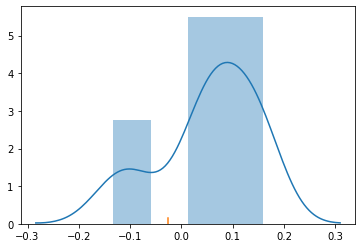

In [292]:

sns.distplot(black_combined)
plt.plot((orig_stat['black_combined'],orig_stat['black_combined']), [0, max(black_combined)]) 


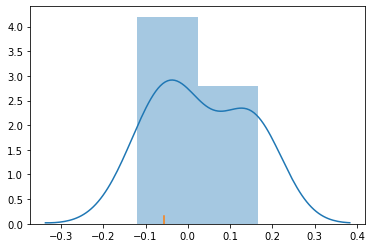

In [290]:
categories = ['hispanic_combined', 'hispanic_majority', 'black_combined', 'black_majority']

sns.distplot(black)
plt.plot((orig_stat['black_majority'],orig_stat['black_majority']), [0, max(black)]) 


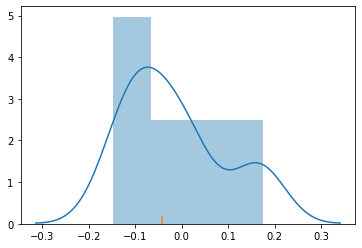

In [291]:
categories = ['hispanic_combined', 'hispanic_majority', 'black_combined', 'black_majority']

sns.distplot(hispanic_combined)
plt.plot((orig_stat['hispanic_combined'],orig_stat['hispanic_combined']), [0, max(hispanic_combined)]) 


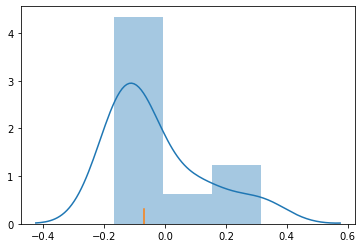

In [286]:
categories = ['hispanic_combined', 'hispanic_majority', 'black_combined', 'black_majority']

sns.distplot(hispanic)
plt.plot((orig_stat['hispanic_majority'],orig_stat['hispanic_majority']), [0, max(hispanic)]) 
